<a href="https://colab.research.google.com/github/rawa-elargab/Spam-Detection/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam Detector**

Prepared by: Rawa El Argab

In [ ]:
import pandas as pd
import re
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.feature_extraction import _stop_words

# Upload Data

In [ ]:
data = pd.read_csv("/content/sample_data/spam.csv",encoding = "'latin'", usecols=["v1","v2"])

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data = data.rename(columns={"v1":"label", "v2": "text"})

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


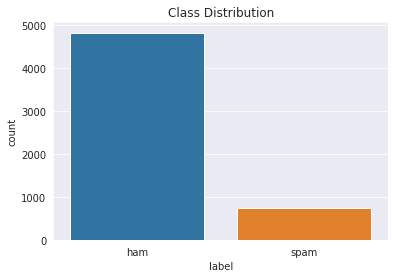

In [ ]:
sns.countplot('label', data=data)
plt.title('Class Distribution')
plt.show()

In [ ]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
data['label'] = data.label.map({'ham':0, 'spam':1})

In [ ]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


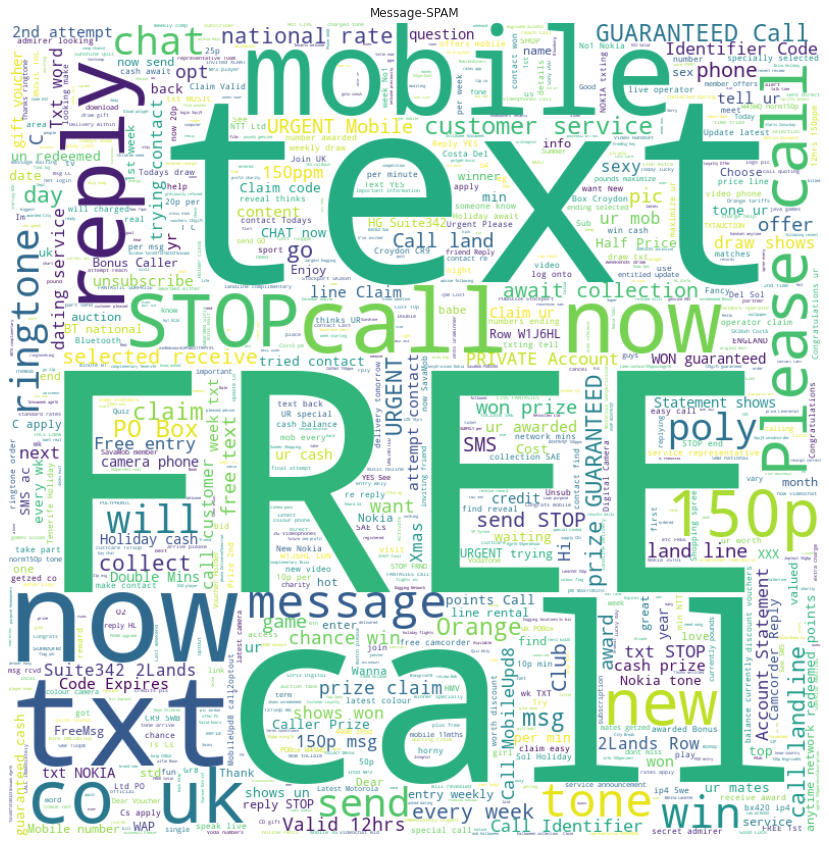

In [ ]:
# Wordcloud for spam texts

spam = data[data["label"]==1]
spam_words = " ".join(comment for comment in spam["text"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                 contour_width=3).generate(spam_words)
# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-SPAM")
plt.axis("off")
plt.show()

# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.text,data.label,test_size = 0.2, stratify = data.label , random_state = 233) 

In [ ]:
data.info

<bound method DataFrame.info of       label                                               text
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# Preprocessing

**Removing Hyperlinks**

In [ ]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

**Lower Case**


In [ ]:
def to_lower(word):
    return word.lower()

**Remove Numbers**

In [ ]:
def remove_number(word):
  return re.sub(r'\d+' , '',word)

**Remove Punctuation**

In [ ]:
def remove_punctuation(word):
  return word.translate(str.maketrans(dict.fromkeys(string.punctuation)))

**Remove Whitespace**

In [ ]:
def remove_whitespace(word):
  return word.strip()

**Clean Up Function**

In [ ]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [ ]:
x_train = [clean_up_pipeline(o) for o in X_train]
x_test = [clean_up_pipeline(o) for o in X_test]

x_train[0]

'welp apparently he retired'

# Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(stop_words="english")

In [ ]:
count_matrix = vectorizer.fit_transform(x_test)
count_array = count_matrix.toarray()

In [ ]:
vectorizer.get_feature_names()[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'abiola',
 'abj',
 'able',
 'abt',
 'abta',
 'acc',
 'accept',
 'accessible',
 'accident']

In [ ]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))

Vocabulary size: 3090


In [ ]:
# encode your data
X_train_df = vectorizer.transform(X_train)
X_test_df = vectorizer.transform(X_test)

In [ ]:
X_train_df[:3].nonzero()

(array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int32),
 array([ 111,  288,  611,  940, 1429, 1438, 1672, 2245, 2671, 2983, 1383,
        1663, 1751, 2041, 2066, 2087, 2428, 2486, 2499, 2764, 2794, 2950],
       dtype=int32))

# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = tfidf_vectorizer.transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

# Models with CV embeddings

In [ ]:
prediction = dict() # a dict to store the output/results/performance of different ML methods


## SVM 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.svm import SVC
classifier_SVM_CV = SVC(kernel = 'rbf', random_state = 223)
classifier_SVM_CV.fit(X_train_df, y_train)

SVC(random_state=223)

In [ ]:
accuracy = cross_val_score(classifier_SVM_CV, X_train_df ,y_train, scoring='accuracy',cv=3)
print(accuracy)

[0.9717362  0.96837147 0.97373737]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 97.12816817796629


In [ ]:
prediction["SVM_CV"] = classifier_SVM_CV.predict(X_test_df)

In [ ]:
print(classification_report(y_test, prediction["SVM_CV"]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
conf_mat_SVM_CV= confusion_matrix(y_test, prediction['SVM_CV'])
print(conf_mat_SVM_CV)
conf_mat_normalized = conf_mat_SVM_CV.astype('float')/conf_mat_SVM_CV.sum(axis=1)[:, np.newaxis]

[[965   1]
 [ 35 114]]


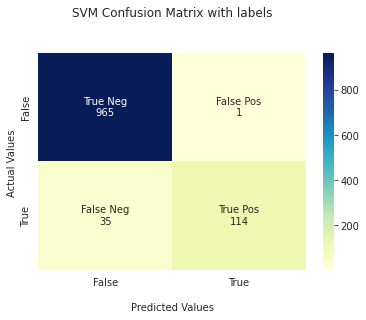

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_SVM_CV.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat_SVM_CV, annot=labels, fmt='', cmap='YlGnBu')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_NB_CV = MultinomialNB()
classifier_NB_CV.fit(X_train_df, y_train)

MultinomialNB()

In [ ]:
prediction["MultinomialNB_CV"] = classifier_NB_CV.predict(X_test_df)

In [ ]:
print(classification_report(y_test, prediction["MultinomialNB_CV"]))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       966
           1       0.84      0.97      0.90       149

    accuracy                           0.97      1115
   macro avg       0.92      0.97      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
conf_mat_NB_CV = confusion_matrix(y_test, prediction['MultinomialNB_CV'])
print(conf_mat_NB_CV)
conf_mat_normalized = conf_mat_NB_CV.astype('float')/conf_mat_NB_CV.sum(axis=1)[:, np.newaxis]

[[939  27]
 [  5 144]]


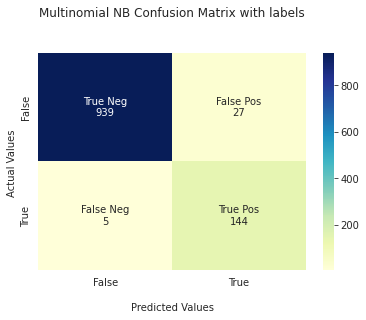

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_NB_CV.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat_NB_CV, annot=labels, fmt='', cmap='YlGnBu')

ax.set_title('Multinomial NB Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_RF_CV = RandomForestClassifier()
classifier_RF_CV.fit(X_train_df, y_train)

RandomForestClassifier()

In [ ]:
prediction["RandomForest_CV"] = classifier_RF_CV.predict(X_test_df)

In [ ]:
print(classification_report(y_test, prediction["RandomForest_CV"]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.95      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
conf_mat_RF_CV = confusion_matrix(y_test, prediction['RandomForest_CV'])
print(conf_mat_RF_CV)
conf_mat_normalized = conf_mat_RF_CV.astype('float')/conf_mat_RF_CV.sum(axis=1)[:, np.newaxis]

[[959   7]
 [ 25 124]]


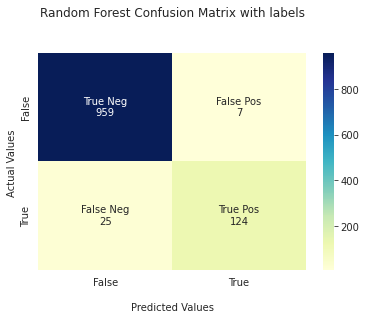

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_RF_CV.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat_RF_CV, annot=labels, fmt='', cmap='YlGnBu')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Models with TF-IDF Embeddings

## SVM 

In [ ]:
classifier_SVM_tdif = SVC(kernel = 'rbf', random_state = 223)
classifier_SVM_tdif.fit(X_train_vectorized, y_train)

SVC(random_state=223)

In [ ]:
accuracy = cross_val_score(classifier_SVM_tdif, X_train_vectorized ,y_train, scoring='accuracy',cv=3)
print(accuracy)

[0.98250336 0.97981157 0.98653199]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 98.29489753222369


In [ ]:
prediction["SVM_tfidf"] = classifier_SVM_tdif.predict(X_test_vectorized)

In [ ]:
print(classification_report(y_test, prediction["SVM_tfidf"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
conf_mat_SVM_TFIDF= confusion_matrix(y_test, prediction['SVM_tfidf'])
print(conf_mat_SVM_TFIDF)
conf_mat_normalized = conf_mat_SVM_TFIDF.astype('float')/conf_mat_SVM_TFIDF.sum(axis=1)[:, np.newaxis]

[[966   0]
 [ 23 126]]


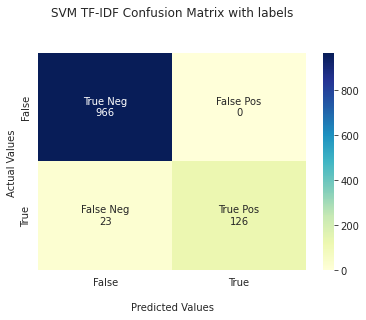

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_SVM_TFIDF.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat_SVM_TFIDF, annot=labels, fmt='', cmap='YlGnBu')

ax.set_title('SVM TF-IDF Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Bayes

In [ ]:
classifier_NB_TFIDF = MultinomialNB()
classifier_NB_TFIDF.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
prediction["MultinomialNB_TFIDF"] = classifier_NB_TFIDF.predict(X_test_vectorized)

In [ ]:
print(classification_report(y_test, prediction["MultinomialNB_TFIDF"]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
conf_mat_NB_TFIDF = confusion_matrix(y_test, prediction['MultinomialNB_TFIDF'])
print(conf_mat_NB_TFIDF)
conf_mat_normalized = conf_mat_NB_TFIDF.astype('float')/conf_mat_NB_TFIDF.sum(axis=1)[:, np.newaxis]

[[966   0]
 [ 33 116]]


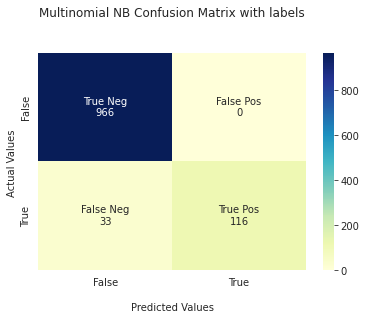

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_NB_TFIDF.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat_NB_TFIDF, annot=labels, fmt='', cmap='YlGnBu')

ax.set_title('Multinomial NB Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [ ]:
classifier_RF_TFIDF = RandomForestClassifier()
classifier_RF_TFIDF.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [ ]:
prediction["RandomForest_TFIDF"] = classifier_RF_TFIDF.predict(X_test_vectorized)

In [ ]:
print(classification_report(y_test, prediction["RandomForest_TFIDF"]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
conf_mat_RF_TFIDF = confusion_matrix(y_test, prediction['RandomForest_TFIDF'])
print(conf_mat_RF_TFIDF)
conf_mat_normalized = conf_mat_RF_TFIDF.astype('float')/conf_mat_RF_TFIDF.sum(axis=1)[:, np.newaxis]

[[966   0]
 [ 26 123]]


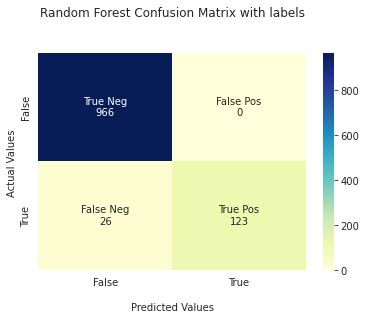

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat_RF_TFIDF.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat_RF_TFIDF, annot=labels, fmt='', cmap='YlGnBu')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Model Comparison

In [ ]:
for id in prediction: print(id , ":", accuracy_score(y_test,prediction[id]))

SVM_CV : 0.967713004484305
MultinomialNB_CV : 0.9713004484304932
RandomForest_CV : 0.9713004484304932
SVM_tfidf : 0.979372197309417
MultinomialNB_TFIDF : 0.9704035874439462
RandomForest_TFIDF : 0.9766816143497757


# Save model to disk

In [ ]:
import pickle

In [ ]:
# save the SVM model with TF-IDF embedding to disk
filename = 'finalized_model.sav'
pickle.dump(classifier_SVM_tdif, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_vectorized, y_test)
print(result)

0.979372197309417
